# ***Documentation for Start Screen (NEA)***

## File Creation

`Main.py`

Below is a copy of the concept used in the section B of the ideal look of the start screen

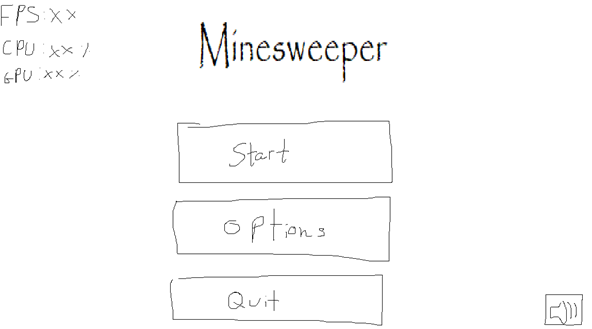

The goal of the documentation here is to show the development procedure in creating the start screen.

## Pygame import

Firstly, I created a blank window of python `(600x600)` and coloured it white.
This is the base colour for the program window when you first start up the game.

Additionally, I added two extra constants here that are colours, these are implemented here to be used in the program somewhere in the future.



---



In [ ]:
#VERSION 1
import pygame

pygame.init()

#window variables
WIDTH, HEIGHT = 600, 600

#display creation
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption('Version 1: Minesweeper')
clock = pygame.time.Clock()

#colours
WHITE = (255,255,255)
GREY = (111,111,111)
BLACK = (0,0,0)

#main loop
running = True
while running:
    for event in pygame.event.get(): # event handling
        if event.type == pygame.QUIT:
            running = False

    screen.fill(WHITE)#background colour

    pygame.display.flip()
    clock.tick(60) #keeps is at a maximum of 60MHz
pygame.quit()

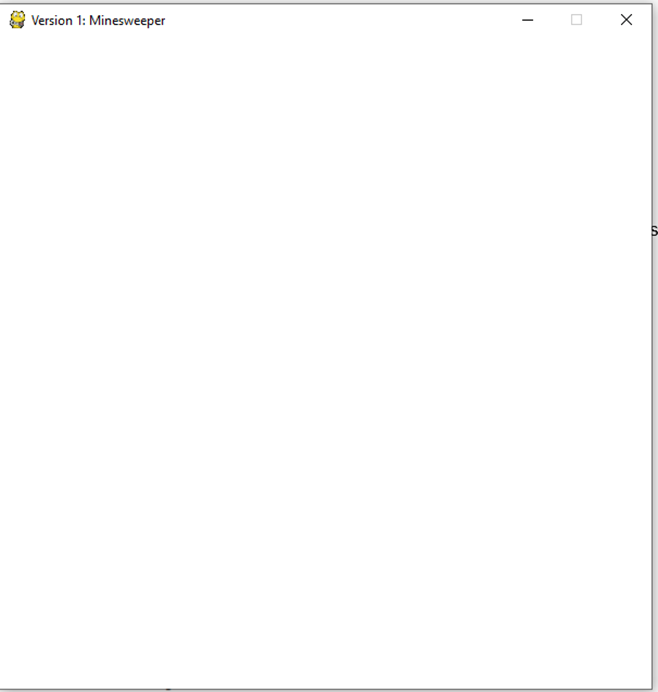

TEST SUCCESS

## Main screen buttons

In this section I'm going to create 3 buttons for the user to be able to interact with and within correct reason play the game aswell with a play button. This menu scene will be all in one function to be ran

New functions used here are image load and convert alpha, Image load just loads an image onto Pygame and converted it too a variable called img, convert_alpha() gives an image with a transparent background.

### Class for Button

[PyGame Beginner Tutorial in Python - Adding Buttons](https://www.youtube.com/watch?v=G8MYGDf_9ho)

Attributes:
 - X Coordinate
 - Y Coordinate
 - Image file
 - Create a rectangle for the image to be confined in

```
class Button():
    def __init__(self, x, y, image): # attributes
        self.image = image
        self.rect = self.image.get_rect()
        self.rect.topleft = (x,y)

    def draw(self):
        #draw button on screen
        screen.blit(self.image, (self.rect.x, self.rect.y))
```



---



In [ ]:
#buttons
start_img = img.convert_alpha() # converts the image to pixel format

class Button():
    def __init__(self, x, y, image): # attributes
        self.image = image
        self.rect = self.image.get_rect()
        self.rect.topleft = (x,y)

    def draw(self):
        #draw button on screen
        screen.blit(self.image, (self.rect.x, self.rect.y))

#create button
start_button = Button(200, 250, start_img)

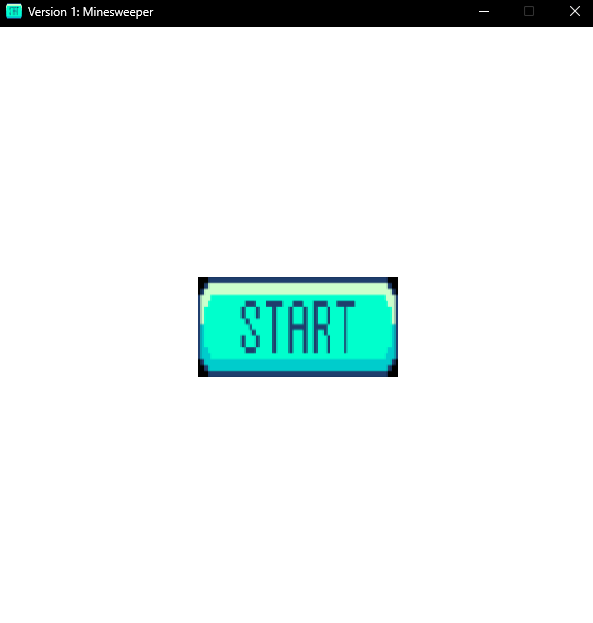

TEST SUCCESS

Something that I had wanted to test with was the functionality of a custom window icon, this is just pure customisability and isnt relevent to the program

This is no longer to be used after finding a more efficient method.
For an easier useability for the program to be programmed on, a tutorial was used to make a button without using an image, this would inturn save memory compared to plain text.

[ PyGame Tutorial For Beginners - How to make Buttons in PyGame](https://www.youtube.com/watch?v=W6Xl9Fhgsw0)

The only change to the attributes to be made is the image

image - > text

Furthermore, additional functions needed:

New colour for when the mouse position is over the buttons box, for example the ordinary colour of the button will be white unless the mouse if hovering over the rectangle box in which it will be grey, using pygame mouse `get_pos()` function.

Additionally, the button will actually function using an event now by creating a new handling event when the mouse down press is colliding with the button, which will create a new instance. This will allow for multiple windows to be played. Creating a new function in the button class to return the rectangle of the button, to then use the collidepoint method and compare the positions of the events. The game will do the action then underneath it. For testing purposes, I will rename the button to quit and have the game exit after.

```
#buttons
class Button():
    def __init__(self, x, y, text):
        font = pygame.font.SysFont('Georgia', 24, bold=True)
        self.surf = font.render(text, True, BLACK)
        self.button = pygame.Rect(x, y, 110, 60)

    def get_button(self):
        return self.button

    def draw(self):
        #draw button on screen
        a,b = pygame.mouse.get_pos()
        if self.button.x <= a <= self.button.x + 110 and self.button.y <= b <= self.button.y + 60:
            pygame.draw.rect(screen, GREY, self.button)
        else:
            pygame.draw.rect(screen, WHITE, self.button)
        screen.blit(self.surf, (self.button.x + 5, self.button.y +5))



#create button
quit_button = Button(200, 250, "Start")
```



```
if event.type == pygame.MOUSEBUTTONDOWN:
            if quit_button.get_button().collidepoint(event.pos):
                running = False

```


```
quit_button.draw()
```




---



In [ ]:
#buttons
class Button():
    def __init__(self, x, y, text):
        font = pygame.font.SysFont('Georgia', 24, bold=True)
        self.surf = font.render(text, True, BLACK)
        self.button = pygame.Rect(x, y, 110, 60)

    def get_button(self):
        return self.button

    def draw(self):
        #draw button on screen
        a,b = pygame.mouse.get_pos()
        if self.button.x <= a <= self.button.x + 110 and self.button.y <= b <= self.button.y + 60:
            pygame.draw.rect(screen, GREY, self.button)
        else:
            pygame.draw.rect(screen, WHITE, self.button)
        screen.blit(self.surf, (self.button.x + 5, self.button.y +5))



#create button
quit_button = Button(200, 250, "Start")

pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


Before hovering

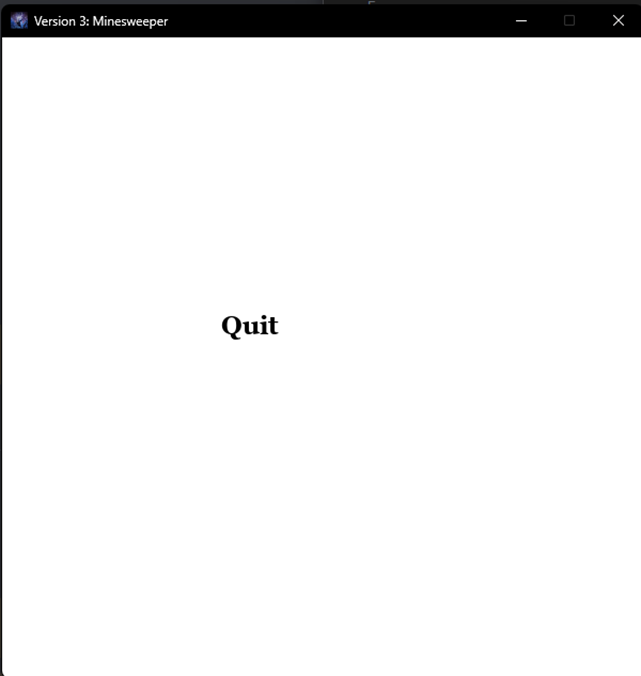

After Hovering

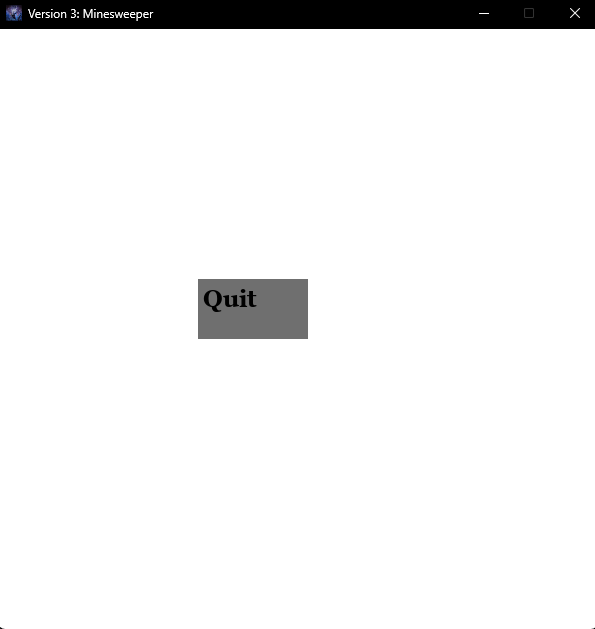

TEST'S SUCCESS

Because there will be 3 functions in the main screen and from the initial draft made in section B, 2 more instances of a button horizontally parallel to each other will be made. For a more visual reference take note of the original concept art.

The width of the application has also been increased for visibility to 1000



---



In [ ]:
def start():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
            if event.type == pygame.MOUSEBUTTONDOWN:
                if quit_button.get_button().collidepoint(event.pos):
                    return False
                elif start_button.get_button().collidepoint(event.pos):
                    game()
                elif option_button.get_button().collidepoint(event.pos):
                    options()
        screen.fill(WHITE)#background colour

        quit_button.draw()
        start_button.draw()
        option_button.draw()

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz

def game():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
        screen.fill(BLACK)#background colour

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz

def options():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
        screen.fill(GREY)#background colour

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz

#create button
start_button = Button(200, 250, "Start")
option_button = Button(300, 350, "Options")
quit_button = Button(400, 450, "Quit")

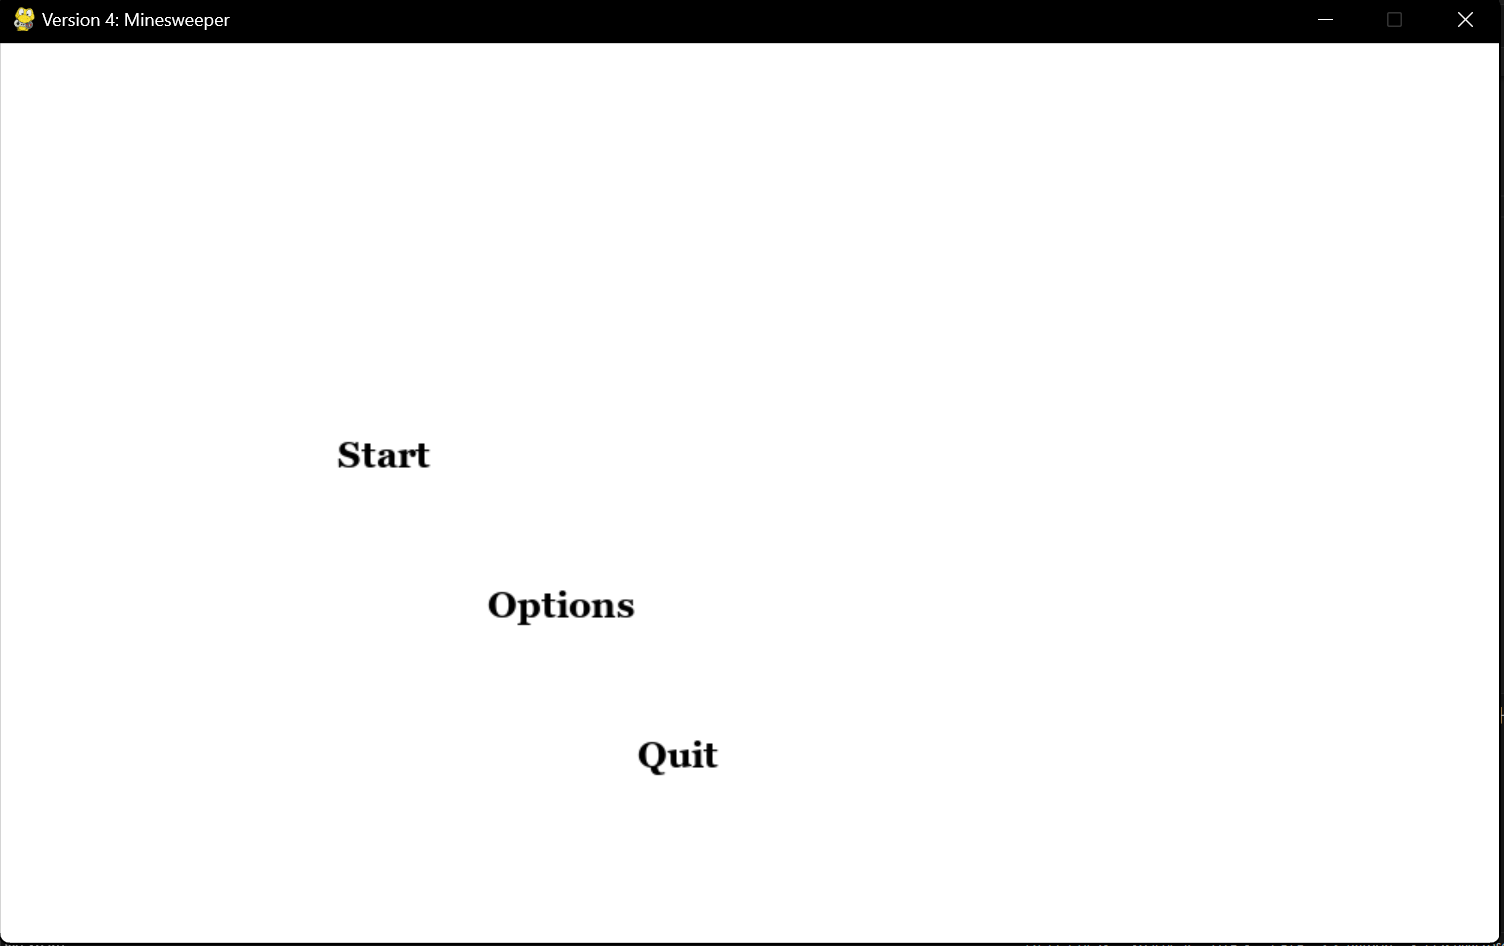

TEST SUCCESS

Start:

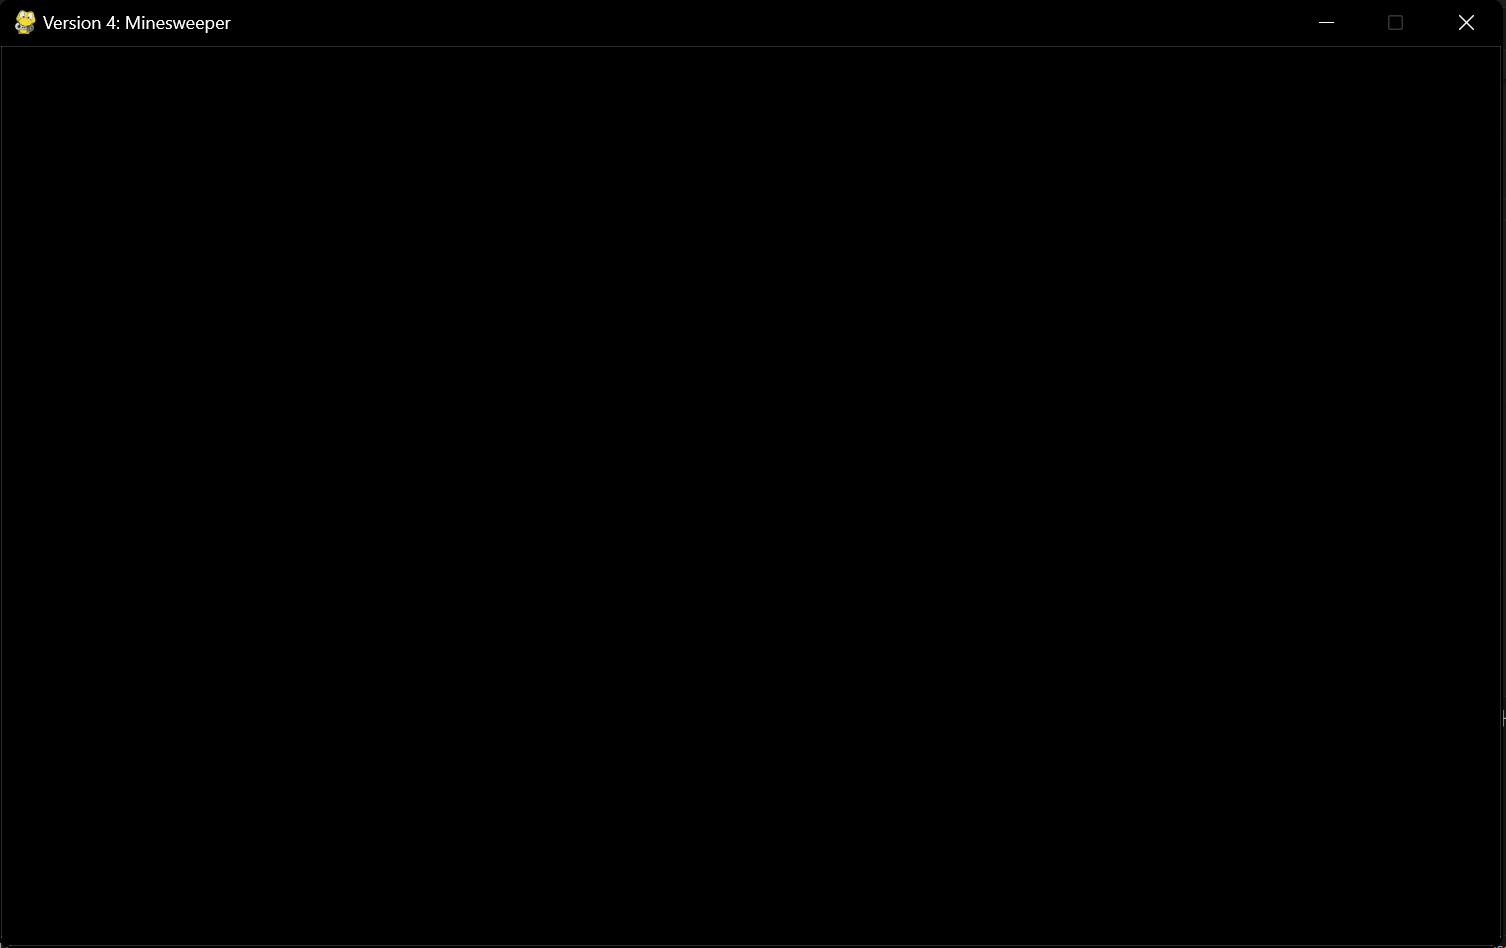

Options:

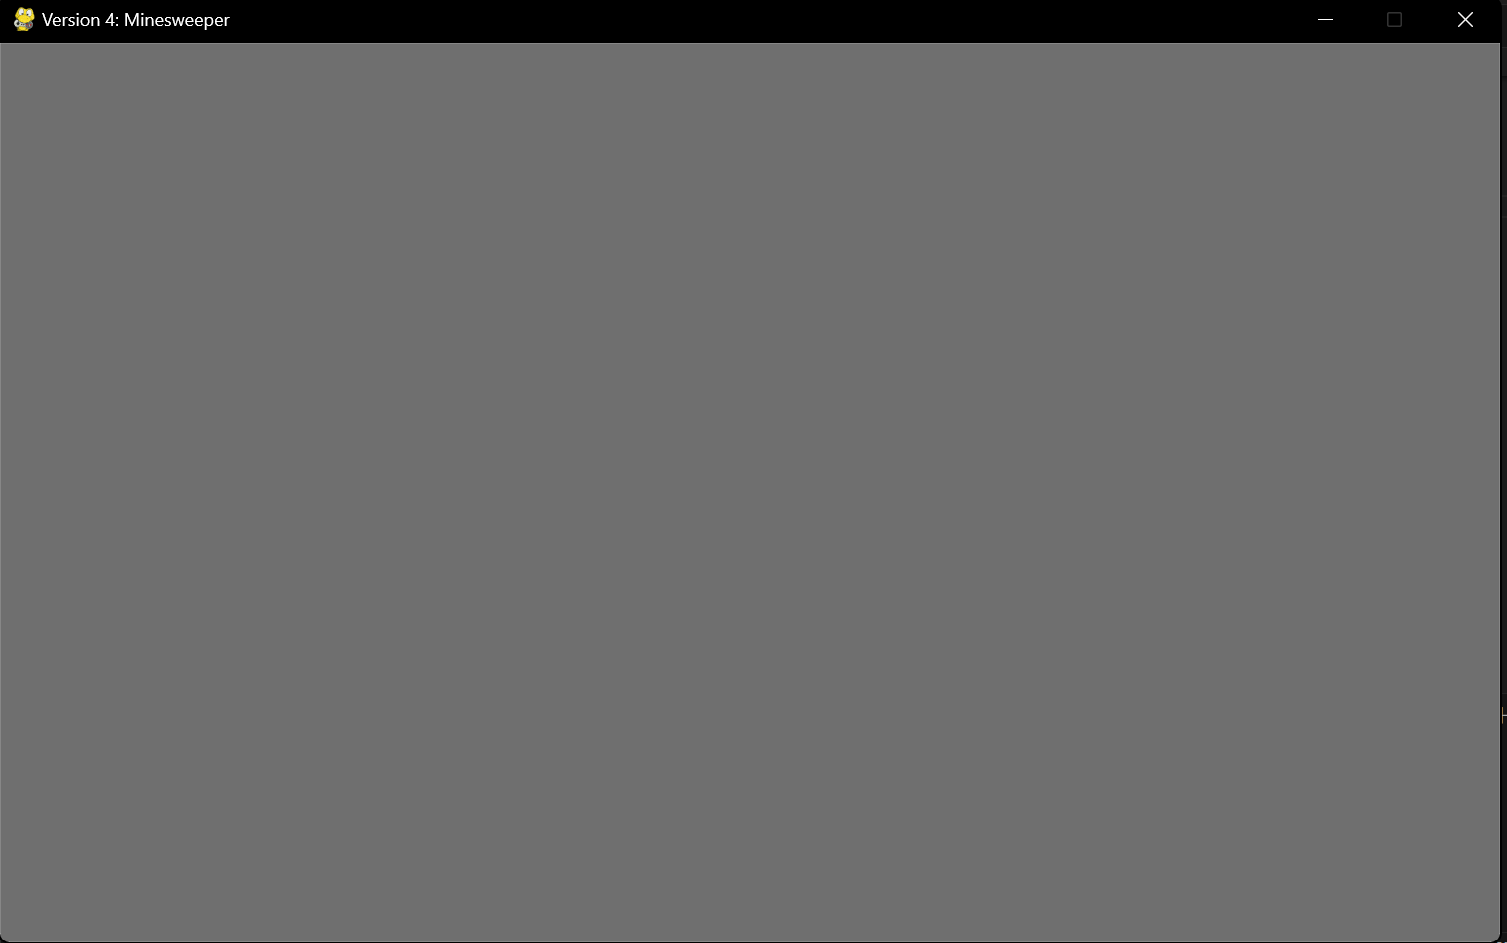

TEST's SUCCESS

A dramatically large change has happened to the code with the main loop being cut down. The first addition to address is 3 new buttons are now added, and are respectivley named aswell, Quit, Start and Option.

---
#### Function 1: Start

This is what the game starts in and when you run the main loop of the program the function of start will return a false value when the user decides to stop playing the game, directly tied to the quit button, though with the mouse button inputs it will move onto the other two functions when clicked



```
def start():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
            if event.type == pygame.MOUSEBUTTONDOWN:
                if quit_button.get_button().collidepoint(event.pos):
                    return False
                elif start_button.get_button().collidepoint(event.pos):
                    game()
                elif option_button.get_button().collidepoint(event.pos):
                    options()
        screen.fill(WHITE)#background colour

        quit_button.draw()
        start_button.draw()
        option_button.draw()

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz
```



#### Function 2: Game

The actual game will be ran here, though the actual logic and function of the game will be written on a new file for easier access, the button class will also be written onto a new file so it can be used in other parts of the program aswell. This is will make it alot easier to manage the creation of button classes when creating the other parts of the menu.
To know that the program was working correctly with logic each functions has a different colour, such as the game function having black while option has grey. In the screenshots below it did work the first time without issue.



```
def game():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
        screen.fill(BLACK)#background colour

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHzs
```



#### Function 3: Option

This function is primarily used for user preferences such as volume control, and potential graphics control, the full scope of customisability hasn't been fully confronted yet. Primary the button class is dominant in the options section where its pure customisability for the user to fit their preferences.




```
def options():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
        screen.fill(GREY)#background colour

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz
```
---

And quit will as previously mensioned, exit the game and close pygame.

Issues and thoughts for the next rendition:
- The buttons are perfectly aligned in the centre, I want to fix this issue next version
- The text isn't perfectly aligned with the hovering of the text
- Next step is creating a button that brings you back to the start screen without pressing the close button on the application
- Lastly I want a string of text on the top of the screen saying the name of the game in a custom font different to the buttons

In [ ]:
def start():
    while True:
        for event in pygame.event.get():  # event handling
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if quit_button.get_button().collidepoint(event.pos):
                    pygame.quit()
                    exit()
                elif start_button.get_button().collidepoint(event.pos):
                    game()
                elif option_button.get_button().collidepoint(event.pos):
                    options()

        screen.fill(WHITE)

        quit_button.draw()
        start_button.draw()
        option_button.draw()

        pygame.display.flip()
        clock.tick(60)  # Keeps is at a maximum of 60 FPS

def game():
    home_button = Button(50, 500, "Home")  # Create Home button
    while True:
        for event in pygame.event.get():  # event handling
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if home_button.get_button().collidepoint(event.pos):
                    return  # Go back to the start screen

        screen.fill(BLACK)
        home_button.draw()

        pygame.display.flip()
        clock.tick(60)

def options():
    home_button = Button(50, 500, "Home")  # Create Home button
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if home_button.get_button().collidepoint(event.pos):
                    return  # Go back to the start screen

        screen.fill(GREY)
        home_button.draw()

        pygame.display.flip()
        clock.tick(60)  # Keeps is at a maximum of 60 FPS

Changes made:
- the user now has a back button in the start and menu portion of the screen


```
def options():
    while True:
        for event in pygame.event.get(): # event handling
            if event.type == pygame.QUIT:
                return False
        screen.fill(GREY)#background colour

        pygame.display.flip()
        clock.tick(60) #keeps is at a maximum of 60MHz
```


- I have changed the program so that whenever the exit button in pressed anywhere in game, the game closes.


```
for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if home_button.get_button().collidepoint(event.pos):
                    return  # Go back to the start screen
```



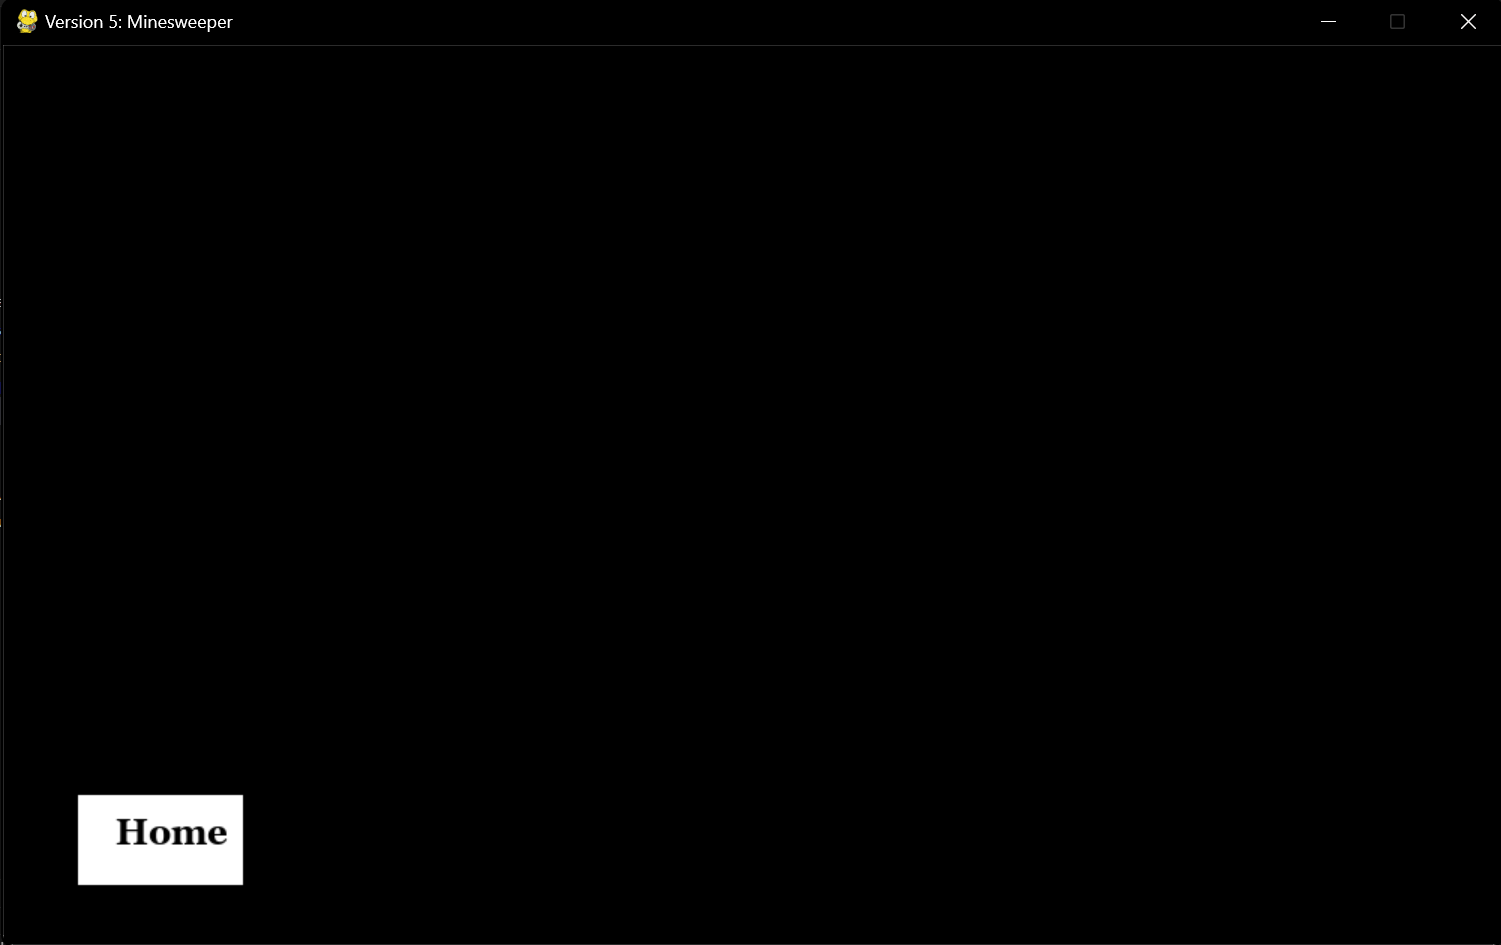

Option Screen

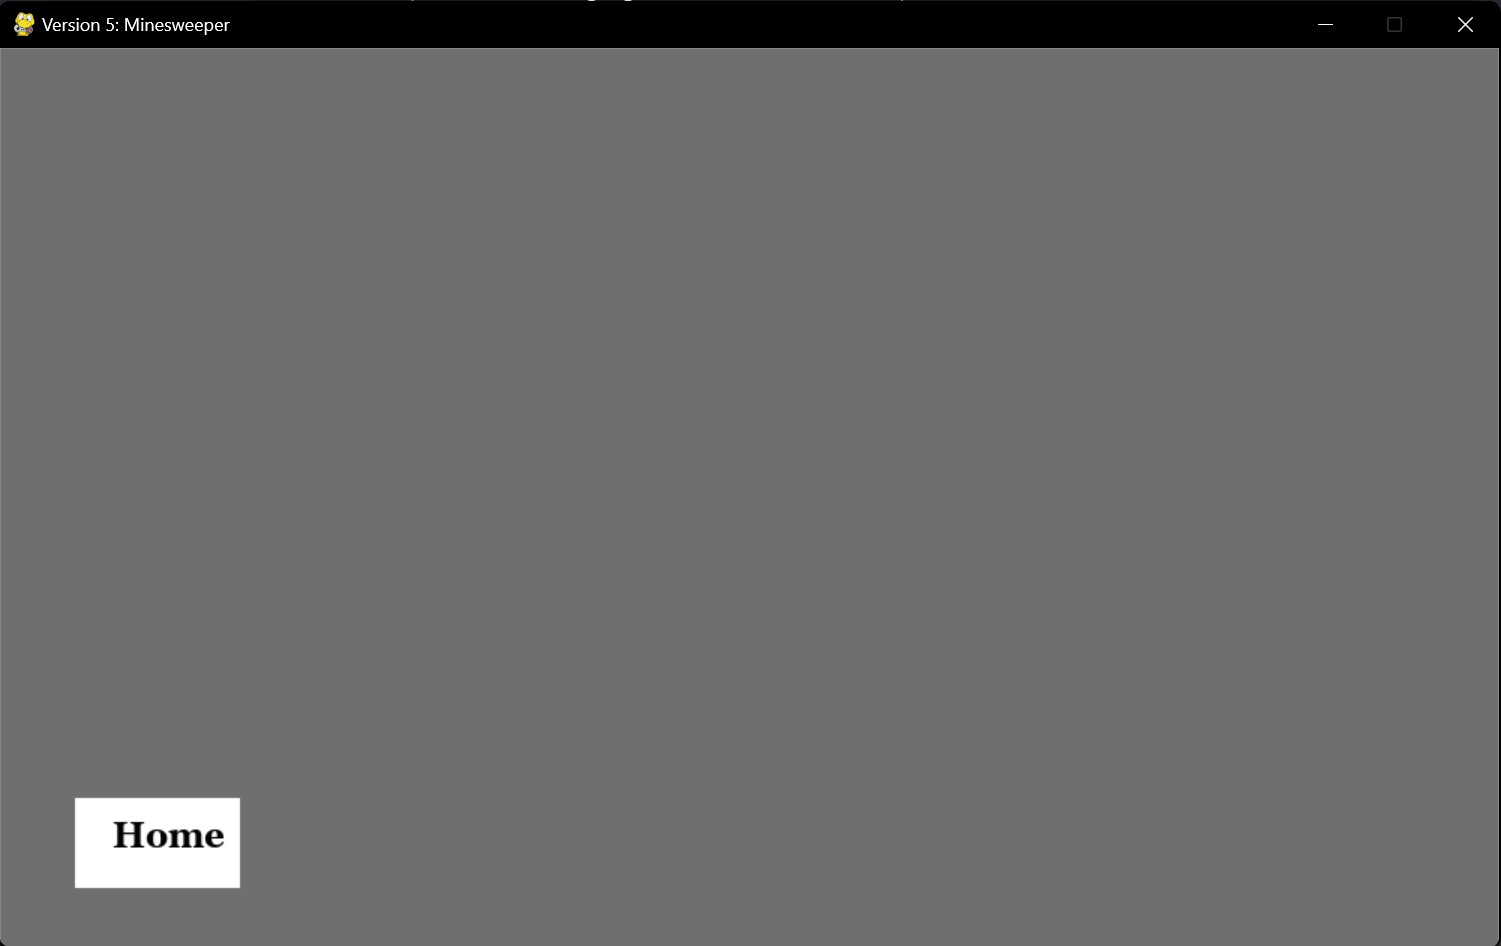

TEST SUCCESS


Main issues to be tackled from the list mensioned above:
Centre the buttons and centering the text

Centering the text will need new attributes in the button class, `text_x` and `text_y`. These will be used to calculate the centre position of the rectangle

To also make the sizes of the button consistent, I have removed the width of the button so it remains constant with each other

[How to center text in pygame](https://stackoverflow.com/questions/23982907/how-to-center-text-in-pygame)

---



In [ ]:
# Buttons
class Button():
    def __init__(self, y, text):
        font = pygame.font.SysFont('Georgia', 24, bold=True)
        self.surf = font.render(text, True, BLACK)
        self.button = pygame.Rect((WIDTH - 110) // 2, y, 110, 60)  # x is dynamically centered
        self.text_x = self.button.x + (self.button.width - self.surf.get_width()) // 2
        self.text_y = self.button.y + (self.button.height - self.surf.get_height()) // 2

    def get_button(self):
        return self.button

    def draw(self):
        # Draw button on screen
        a, b = pygame.mouse.get_pos()
        if self.button.collidepoint(a, b):  # If mouse is hovering over the button
            pygame.draw.rect(screen, GREY, self.button)
        else:
            pygame.draw.rect(screen, WHITE, self.button)
        screen.blit(self.surf, (self.text_x, self.text_y))  # Centered text

Then use these values in the draw method to blit the text in the positions

Additionally, I centred the buttons in the centre where it can be dynamically calculated, meaning where ever the button is on the y axis I can centre the button. This is to make it easier for me to use the buttons, though later I want to blit the back buttons in each function onto the top left of the screen


---



In [ ]:
# Buttons
class Button():
    def __init__(self, y, text):
        font = pygame.font.SysFont('Georgia', 24, bold=True)
        self.surf = font.render(text, True, BLACK)
        self.button = pygame.Rect((WIDTH - 110) // 2, y, 110, 60)
        self.text_x = self.button.x + (self.button.width - self.surf.get_width()) // 2
        self.text_y = self.button.y + (self.button.height - self.surf.get_height()) // 2

    def get_button(self):
        return self.button

    def draw(self):
        # Draw button on screen
        a, b = pygame.mouse.get_pos()
        if self.button.collidepoint(a, b):  # If mouse is hovering over the button
            pygame.draw.rect(screen, GREY, self.button)
        else:
            pygame.draw.rect(screen, WHITE, self.button)
        screen.blit(self.surf, (self.text_x, self.text_y))  # Centered text

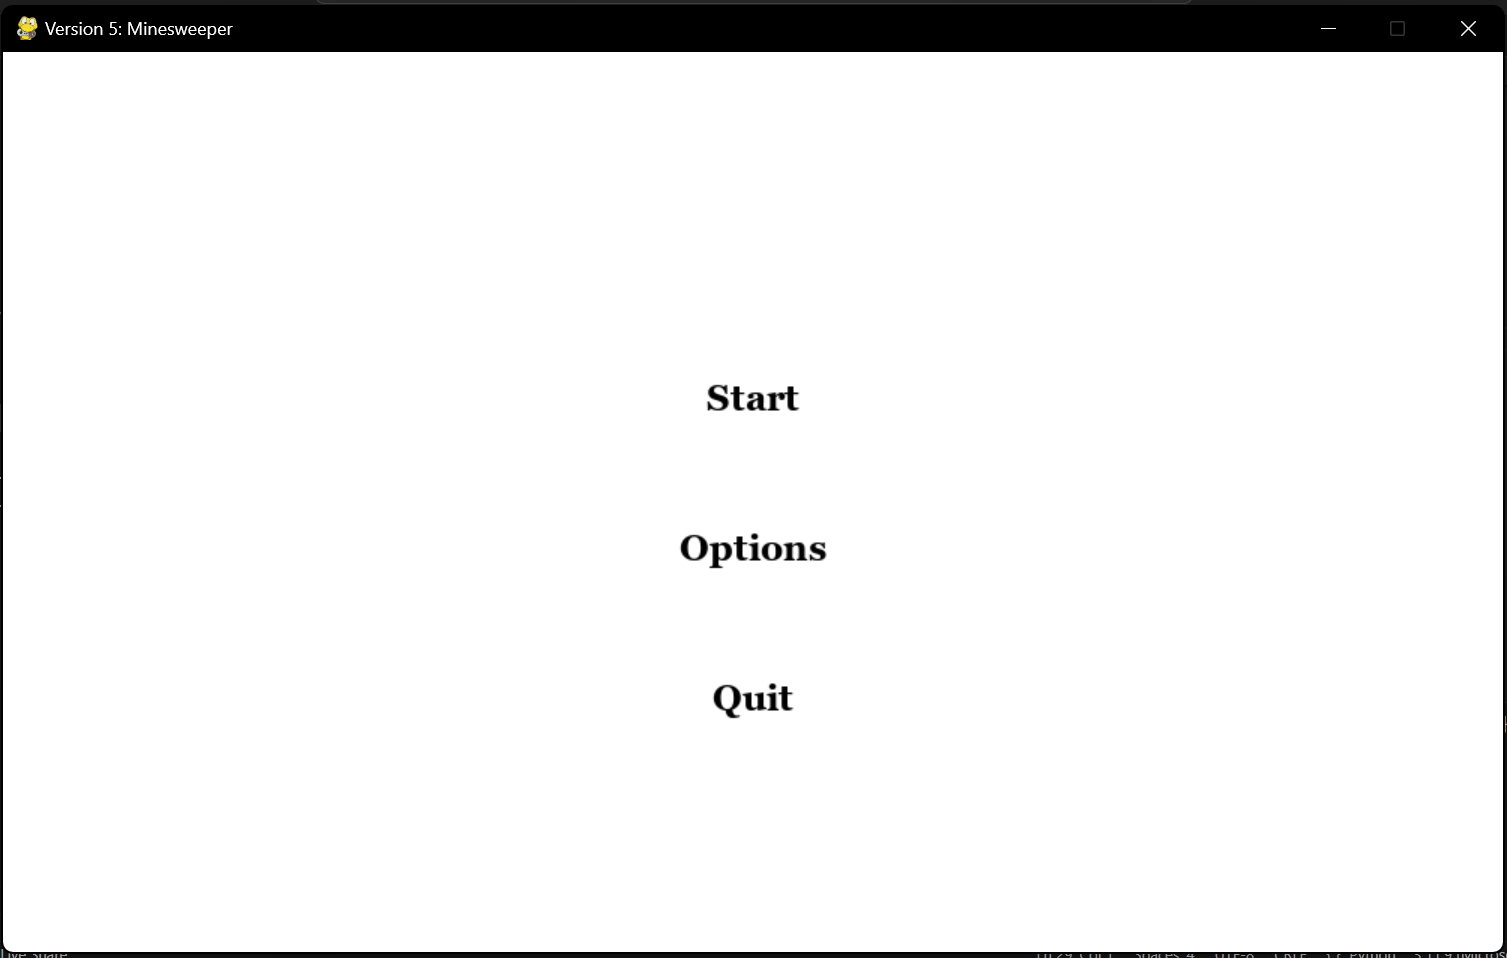

test SUCCESS

An example of the functions where the button is not in its ideal place.

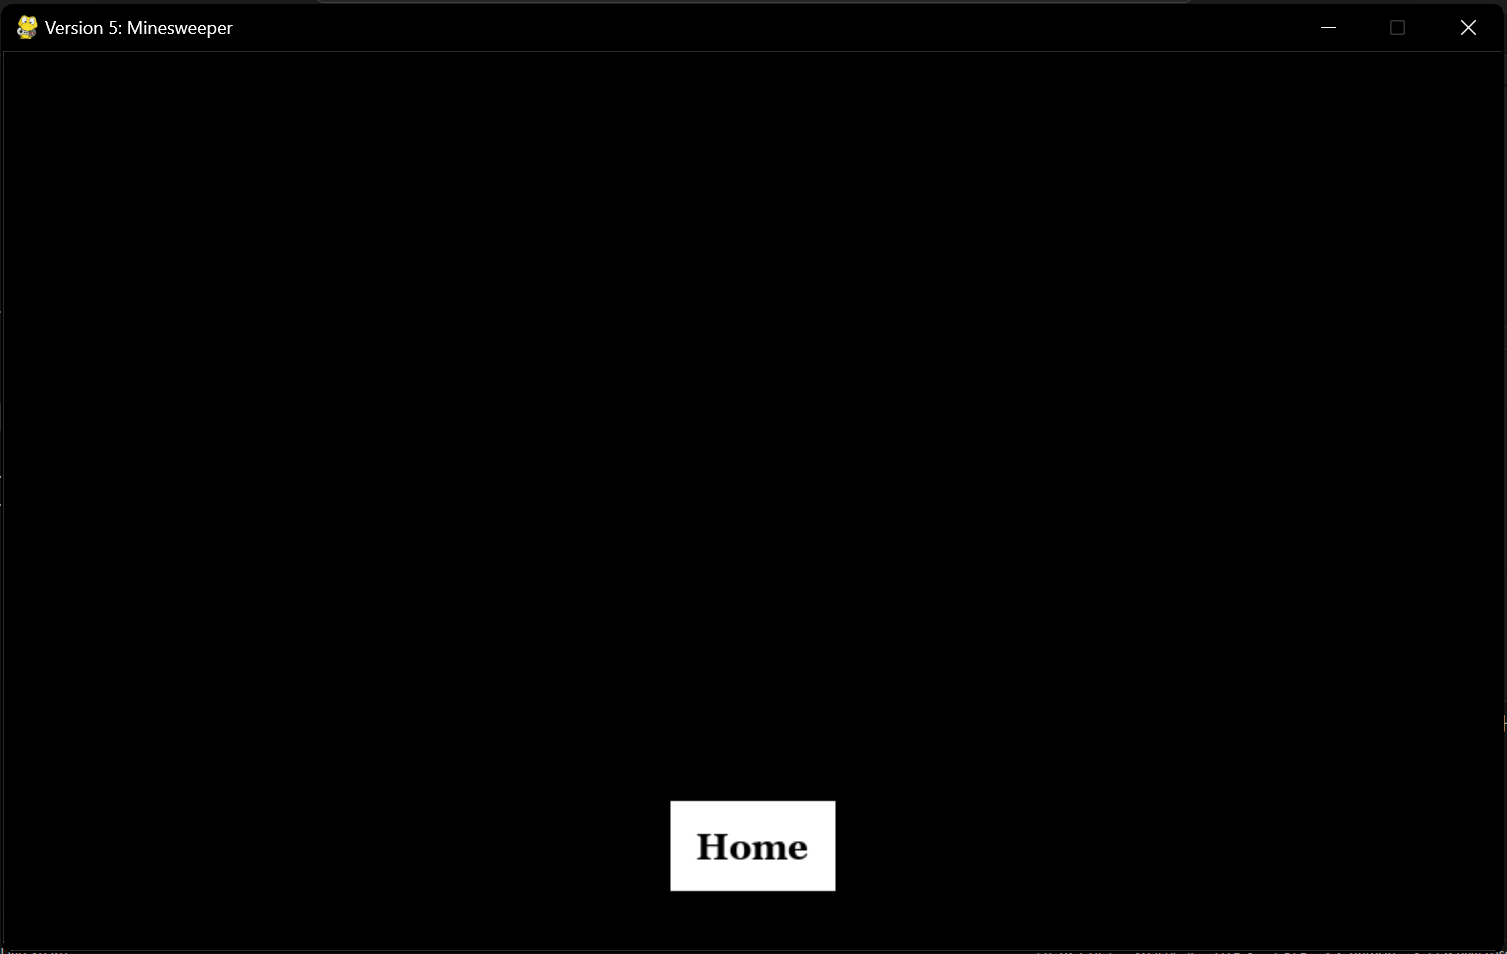

TEST FAILURE

I felt it was more suitable to place the back buttons on the top right of the screen so i did this by changing the attributes of the width inside the instanstiation of the back button object.


```
back_button = Button(WIDTH - 120, 20, "Back", width=100)
```



## Text

A new addition to the program is the text as mensioned in the points above, i went about this by creating a new function for the text to be drawn on, since its not a button i felt a new seperate function would be useful to use, i can also use this throughout the program.

[python display text to pygame window](https://www.geeksforgeeks.org/python-display-text-to-pygame-window/)

In [ ]:
def draw_title():
    """Draws the title 'test' at the top-center of the screen in Papyrus font."""
    papyrus_font = pygame.font.SysFont('Papyrus', 36, bold=True)
    text_surf = papyrus_font.render("test", True, BLACK)
    text_x = (WIDTH - text_surf.get_width()) // 2
    text_y = 20  # Top-center
    screen.blit(text_surf, (text_x, text_y))

To stick to the theme of the original concept art made at the start, i used the papyrus font for the text.
As for testing i used the text "test" to see if it would actually render

In [ ]:
def draw_title():
    """Draws the title 'test' at the top-center of the screen in Papyrus font."""
    papyrus_font = pygame.font.SysFont('Papyrus', 36, bold=True)
    text_surf = papyrus_font.render("test", True, BLACK)
    text_x = (WIDTH - text_surf.get_width()) // 2
    text_y = 20  # Top-center
    screen.blit(text_surf, (text_x, text_y))

def start():
    while True:
        for event in pygame.event.get():  # Event handling
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if quit_button.get_button().collidepoint(event.pos):
                    pygame.quit()
                    exit()
                elif start_button.get_button().collidepoint(event.pos):
                    game()
                elif option_button.get_button().collidepoint(event.pos):
                    options()

        screen.fill(WHITE)  # Background colour

        draw_title()
        quit_button.draw()
        start_button.draw()
        option_button.draw()

        pygame.display.flip()
        clock.tick(60)  # Keeps is at a maximum of 60 FPS

def game():
    back_button = Button(WIDTH - 120, 20, "Back", width=100)  # Back button in the top-right corner
    while True:
        for event in pygame.event.get():  # Event handling
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if back_button.get_button().collidepoint(event.pos):
                    return  # Go back to the start screen

        screen.fill(BLACK)  # Background colour

        back_button.draw()

        pygame.display.flip()
        clock.tick(60)  # Keeps is at a maximum of 60 FPS

def options():
    back_button = Button(WIDTH - 120, 20, "Back", width=100)  # Back button in the top-right corner
    while True:
        for event in pygame.event.get():  # Event handling
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if back_button.get_button().collidepoint(event.pos):
                    return  # Go back to the start screen

        screen.fill(GREY)  # Background colour

        draw_title()
        back_button.draw()

        pygame.display.flip()
        clock.tick(60)  # Keeps is at a maximum of 60 FPS

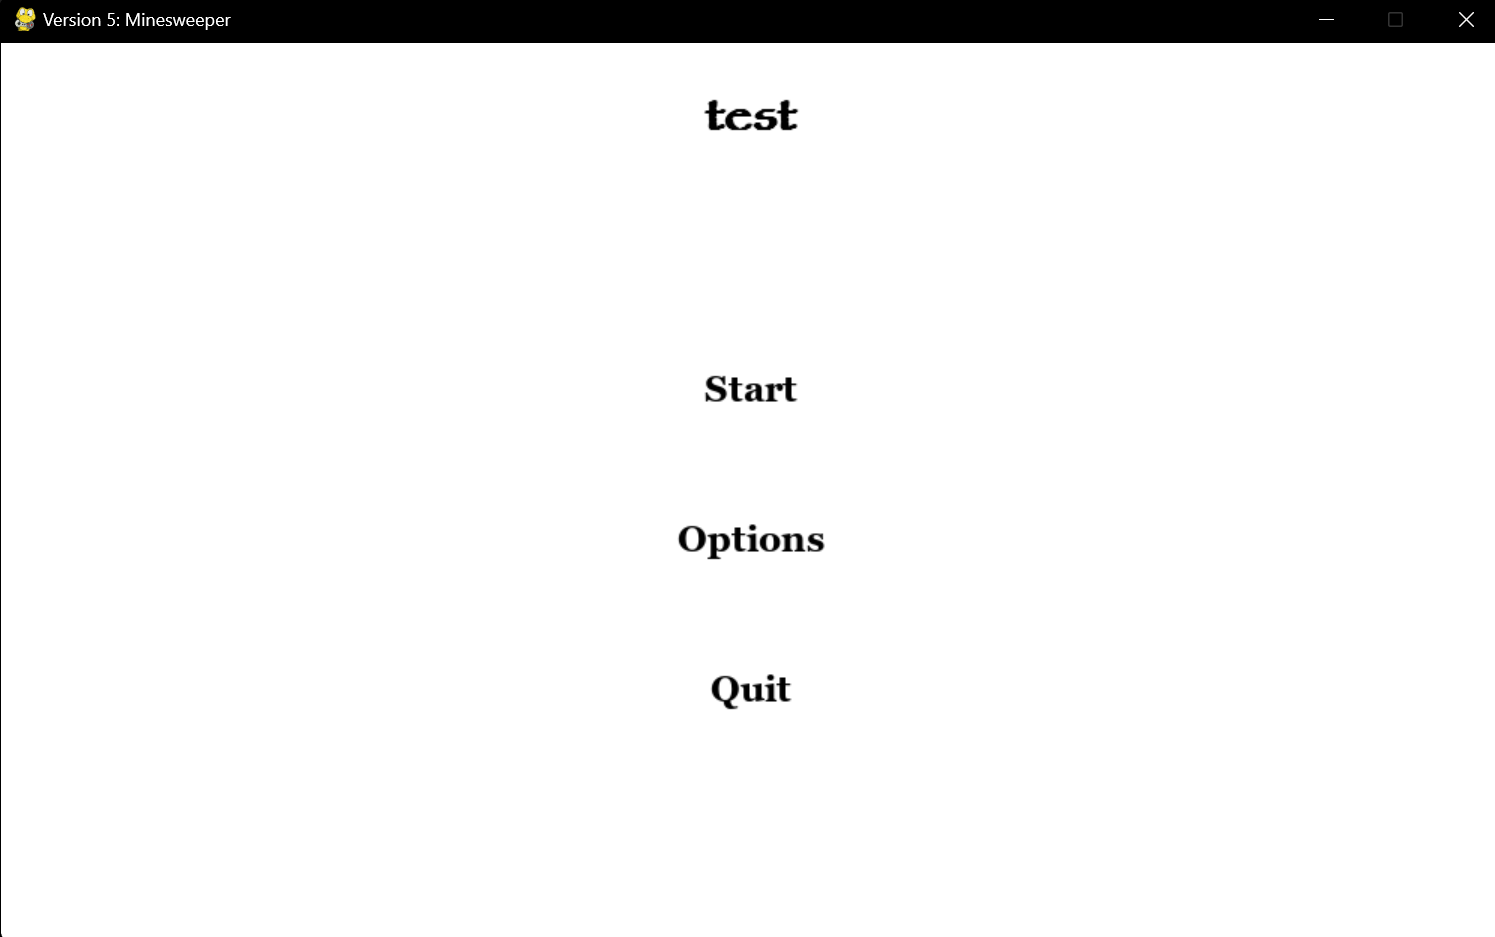

TEST SUCCESS

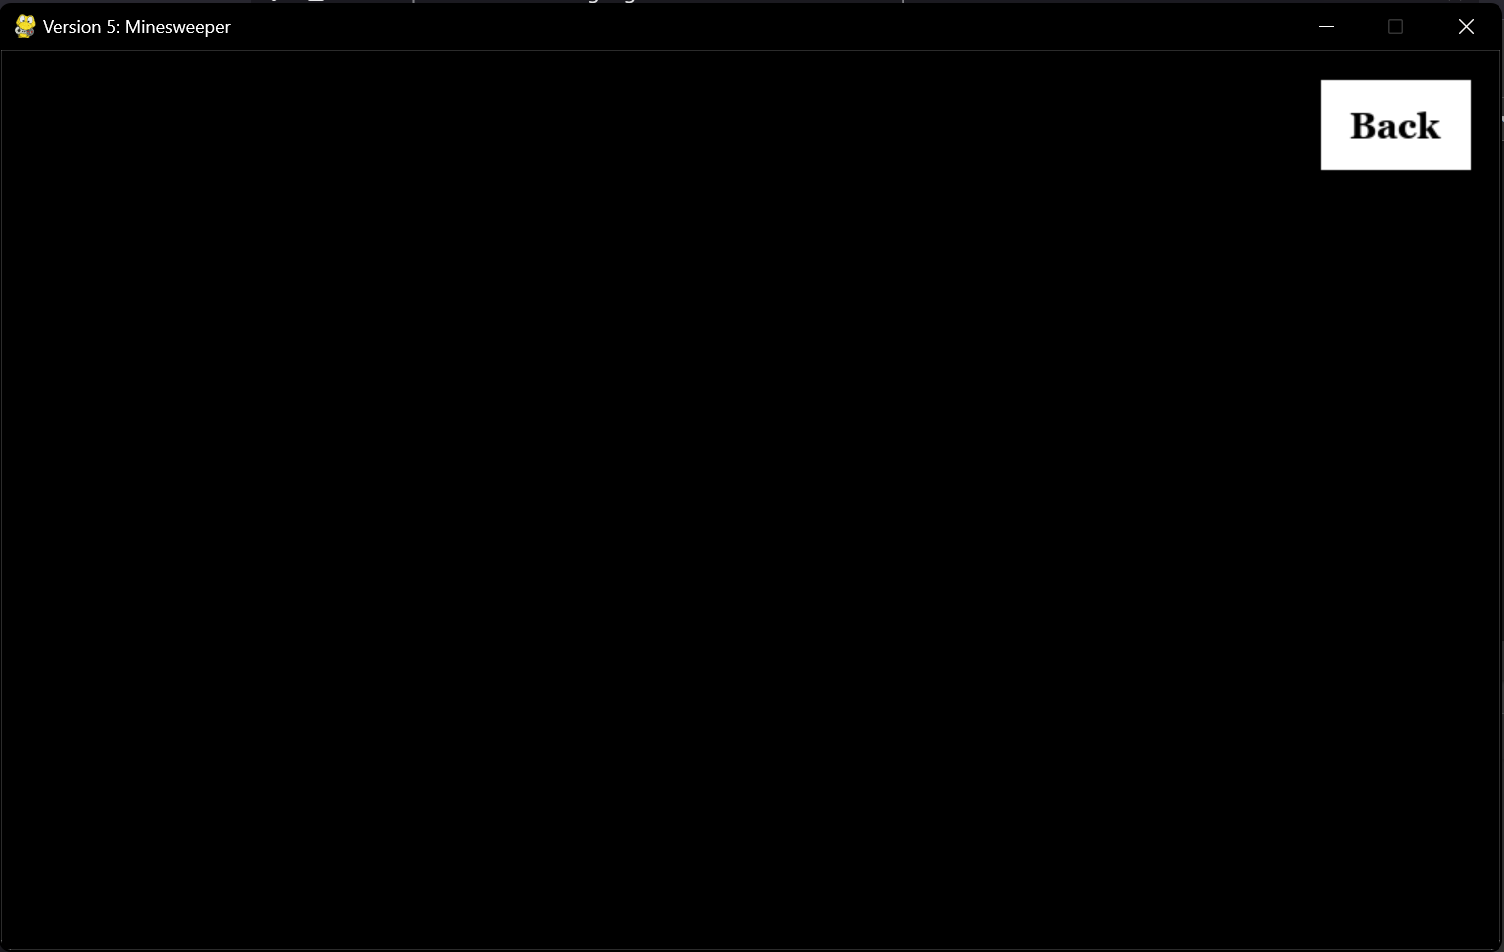

TEST SUCCESS

To make the program look like the original concept image even more, I added borders to the program, and increased the width of the buttons in the start screen, this means not increasing the width of the back buttons.

By just adding an extra property to the rectangle I can add a new property!


```
pygame.draw.rect(screen, BLACK, self.button, 3)
```



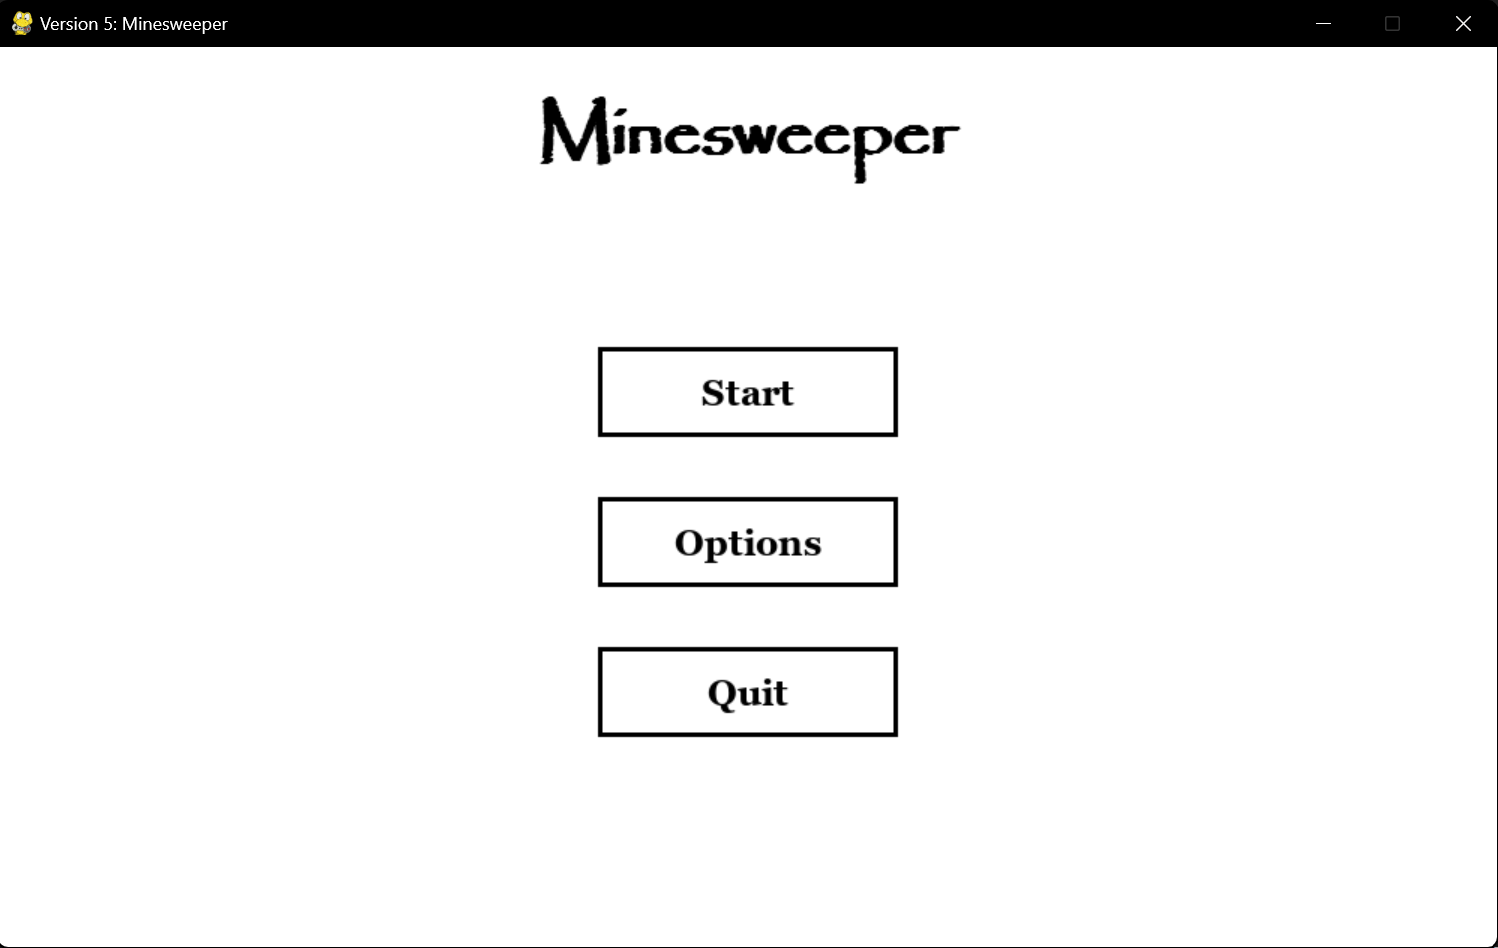

TEST SUCCESS

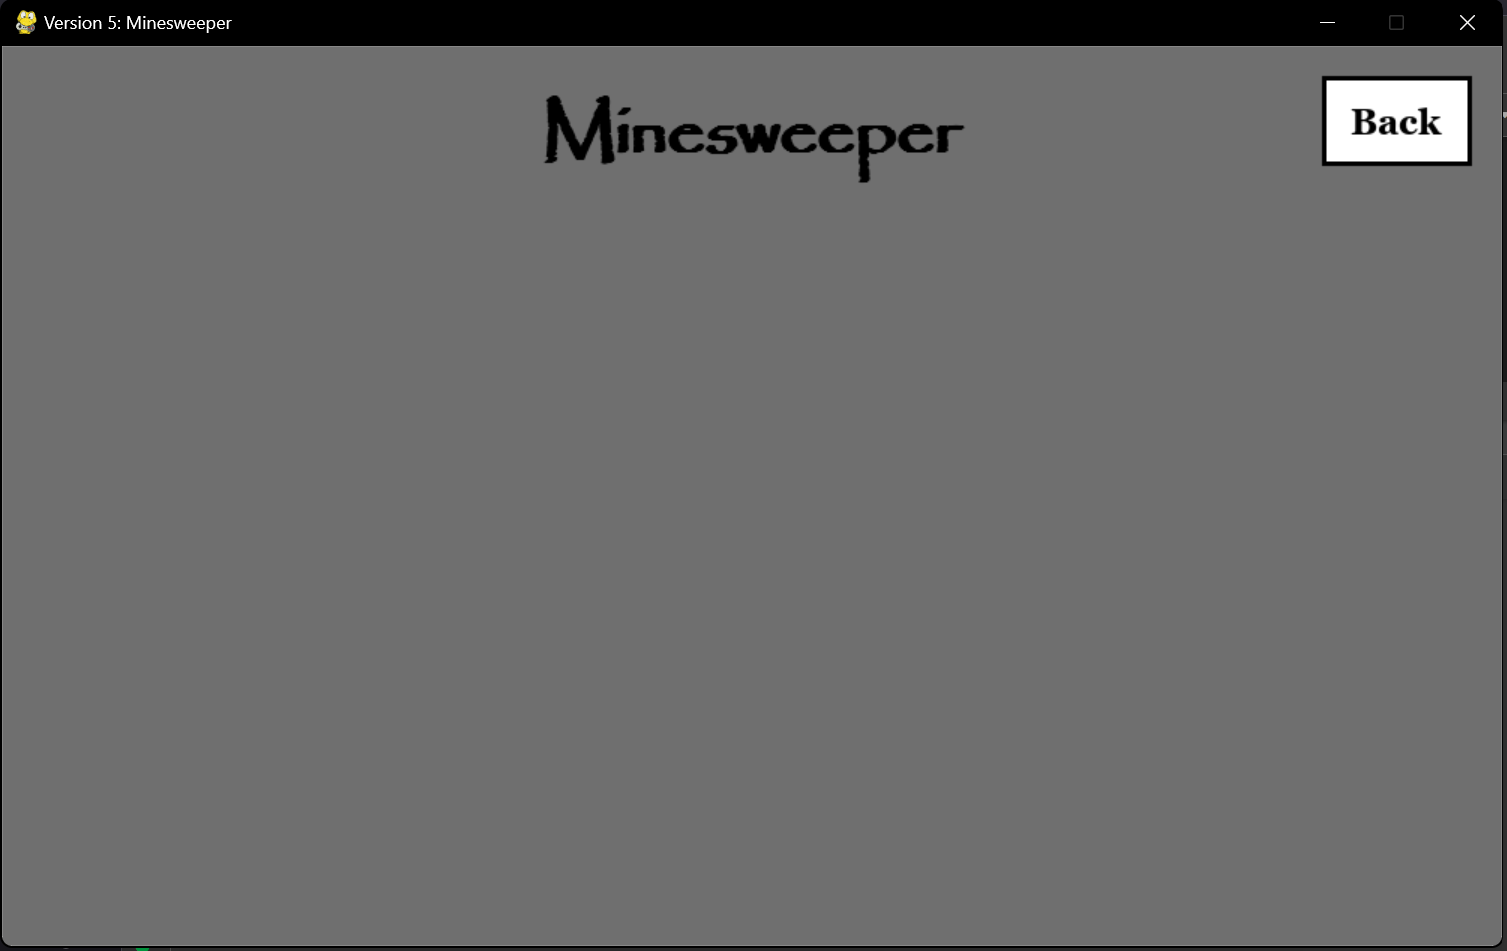

The program is looking alot cleaner now and does as intended, an issue i fixed next rendition was that the text persisted through the game function which didnt really make sense, so i removed it

Additionally, the wanted to add the fps clock and CPU usage to the program now, this would include a new library that needs to be added to the program.

psutil

[Documentation for psutil, CPU](https://code.google.com/archive/p/psutil/wikis/Documentation.wiki#CPU)

I've created a new function for them to be displayed on the top left of the program and will persist through all functions as utility for the user, a feature will be added later on where this is toggle-able.



```
def draw_fps_and_cpu():
    """Displays the FPS and CPU usage on the screen."""
    font = pygame.font.SysFont('Arial', 18, bold=True)

    # FPS
    fps = f"FPS: {int(clock.get_fps())}"
    fps_surf = font.render(fps, True, BLACK)
    screen.blit(fps_surf, (10, 10))  # Top-left corner

    # CPU usage
    cpu_usage = f"CPU: {psutil.cpu_percent()}%"
    cpu_surf = font.render(cpu_usage, True, BLACK)
    screen.blit(cpu_surf, (10, 40))  # Below the FPS
```


```
draw_fps_and_cpu()
```




In [ ]:
def draw_fps_and_cpu():
    """Displays the FPS and CPU usage on the screen."""
    font = pygame.font.SysFont('Arial', 18, bold=True)

    # FPS
    fps = f"FPS: {int(clock.get_fps())}"
    fps_surf = font.render(fps, True, BLACK)
    screen.blit(fps_surf, (10, 10))  # Top-left corner

    # CPU usage
    cpu_usage = f"CPU: {psutil.cpu_percent()}%"
    cpu_surf = font.render(cpu_usage, True, BLACK)
    screen.blit(cpu_surf, (10, 40))  # Below the FPS

def start():
        draw_fps_and_cpu()  # Draw FPS and CPU usage

GPU usage needed alot more programming than required so i have not included it in this program.

Additionally, the counter's weren't showing on the game function, it was because the background colour was black, so i changed it to red

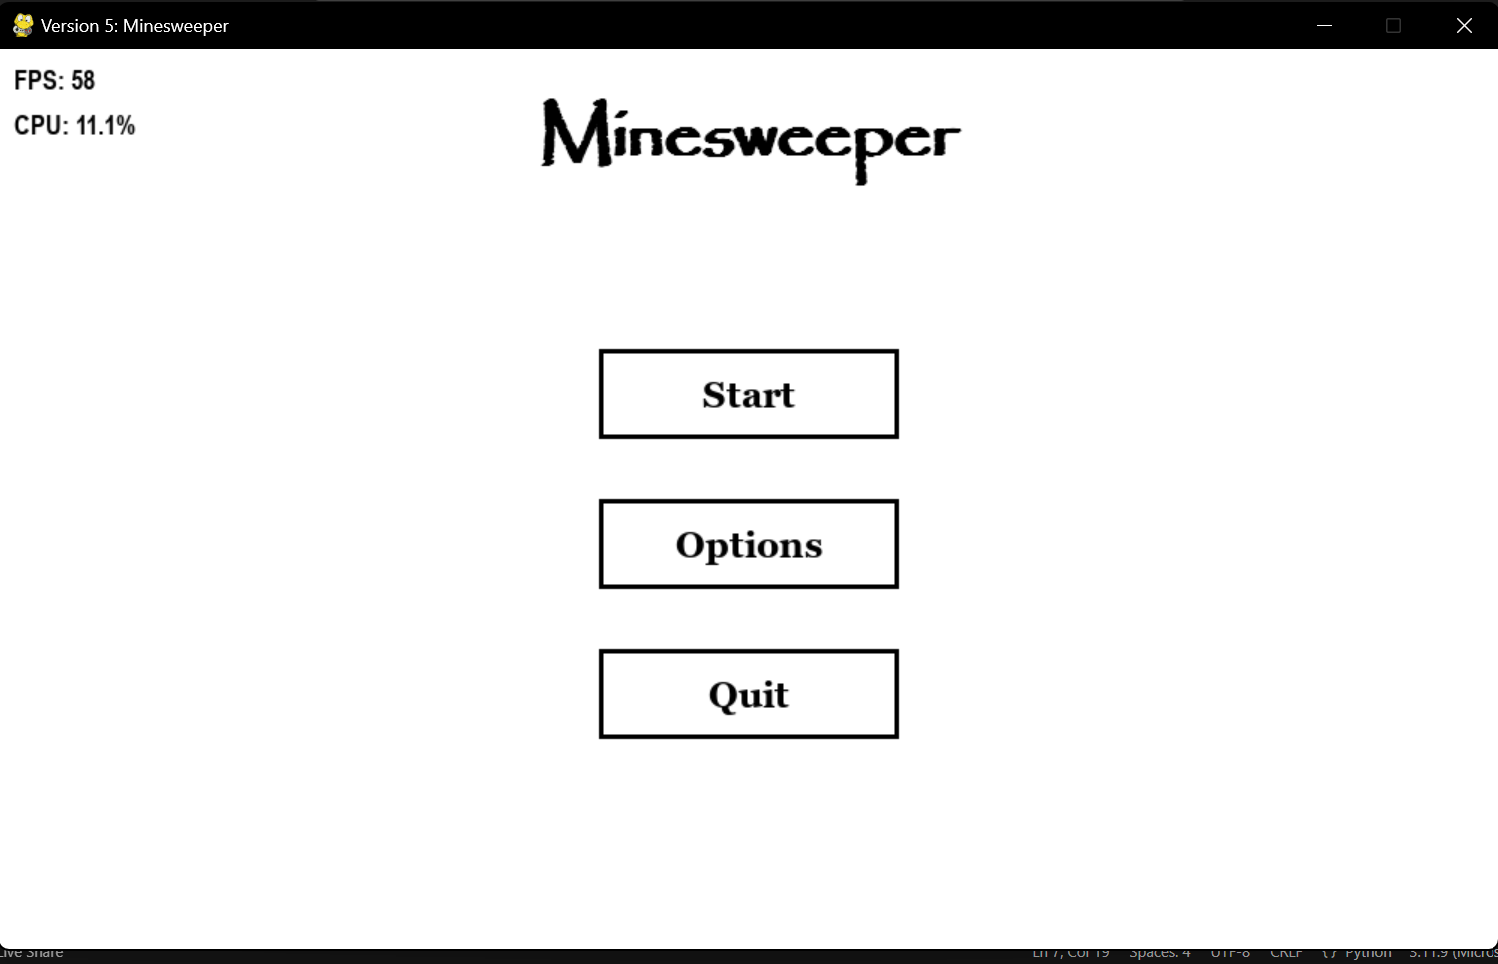

TEST SUCCESS

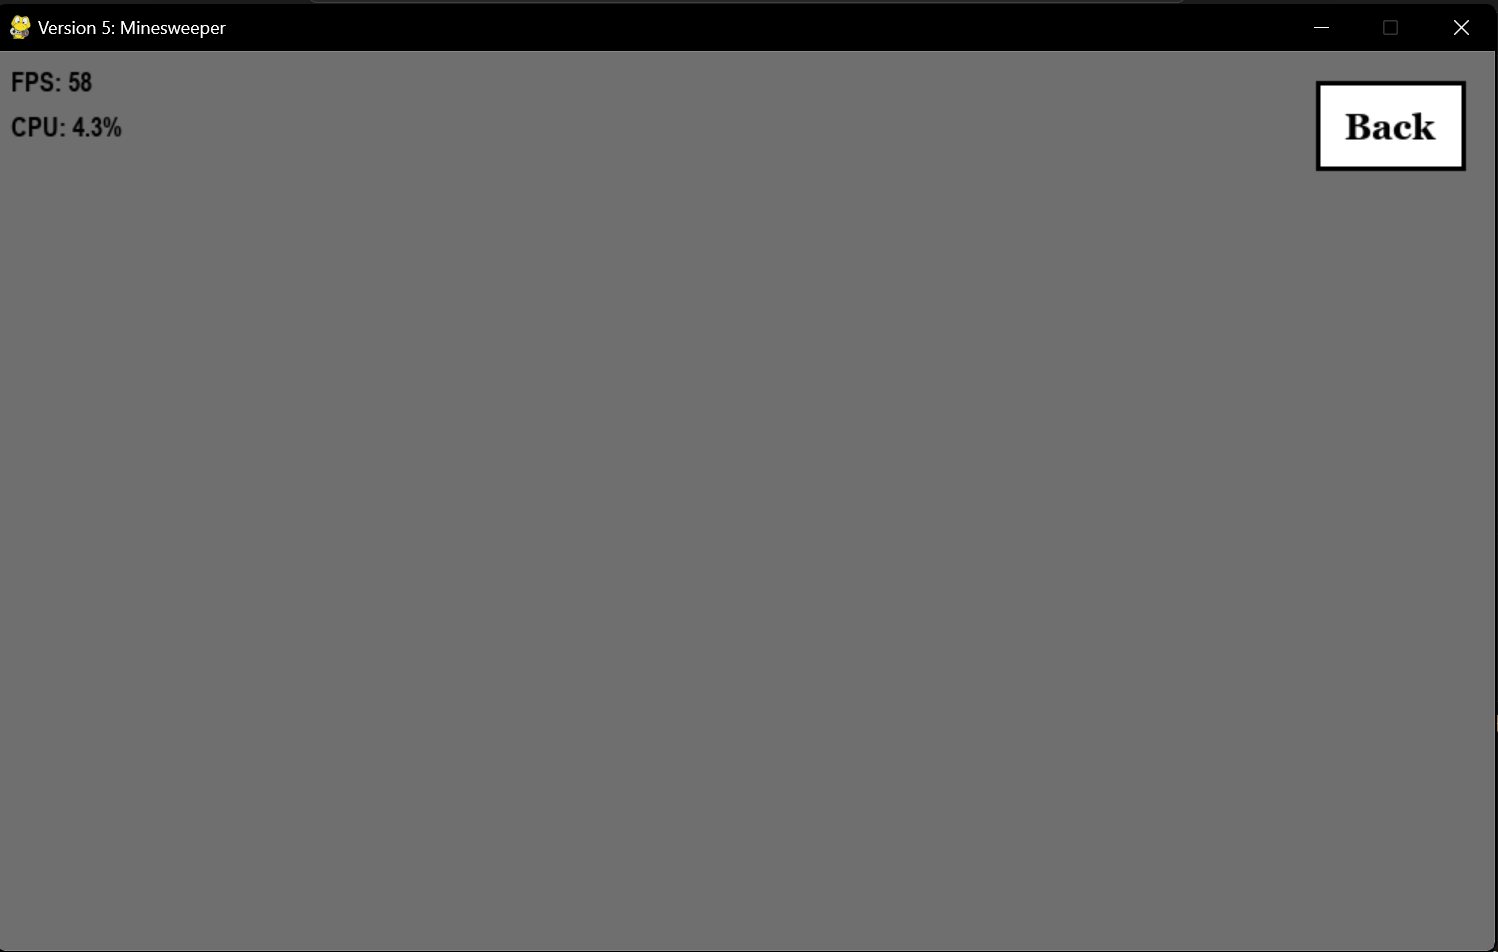

TEST SUCCESS

## Sound

Lastly before the start screen is completely finished, the concept art had a music button that was toggle-able in the start screen to mute or unmute, my idea was that this would show only in the start screen and not show up on any other screen, though this button would be more expanded on in the options function where the volume is a slider for the user to choose their personal volume percentage.

New additions to the program is a new function and button to control the music in the game
Additionally, a music file was added and is controlled using pygames pre-built functions for sound handling.

[Mixer Pygame](https://www.pygame.org/docs/ref/mixer.html)

[Sound Tutorial](https://www.youtube.com/watch?v=3Yhhzflmxfs)

In [ ]:
# Music Initialization
pygame.mixer.init()
pygame.mixer.music.load("FirelinkShrine.mp3")
pygame.mixer.music.play(-1)  # Loop indefinitely
music_on = True

def toggle_music():
    """Toggles the music on and off."""
    global music_on
    if music_on:
        pygame.mixer.music.pause()
        music_on = False
    else:
        pygame.mixer.music.unpause()
        music_on = True

def start():
    global music_on
    while True:
        music_button.draw()

        pygame.display.flip()



---



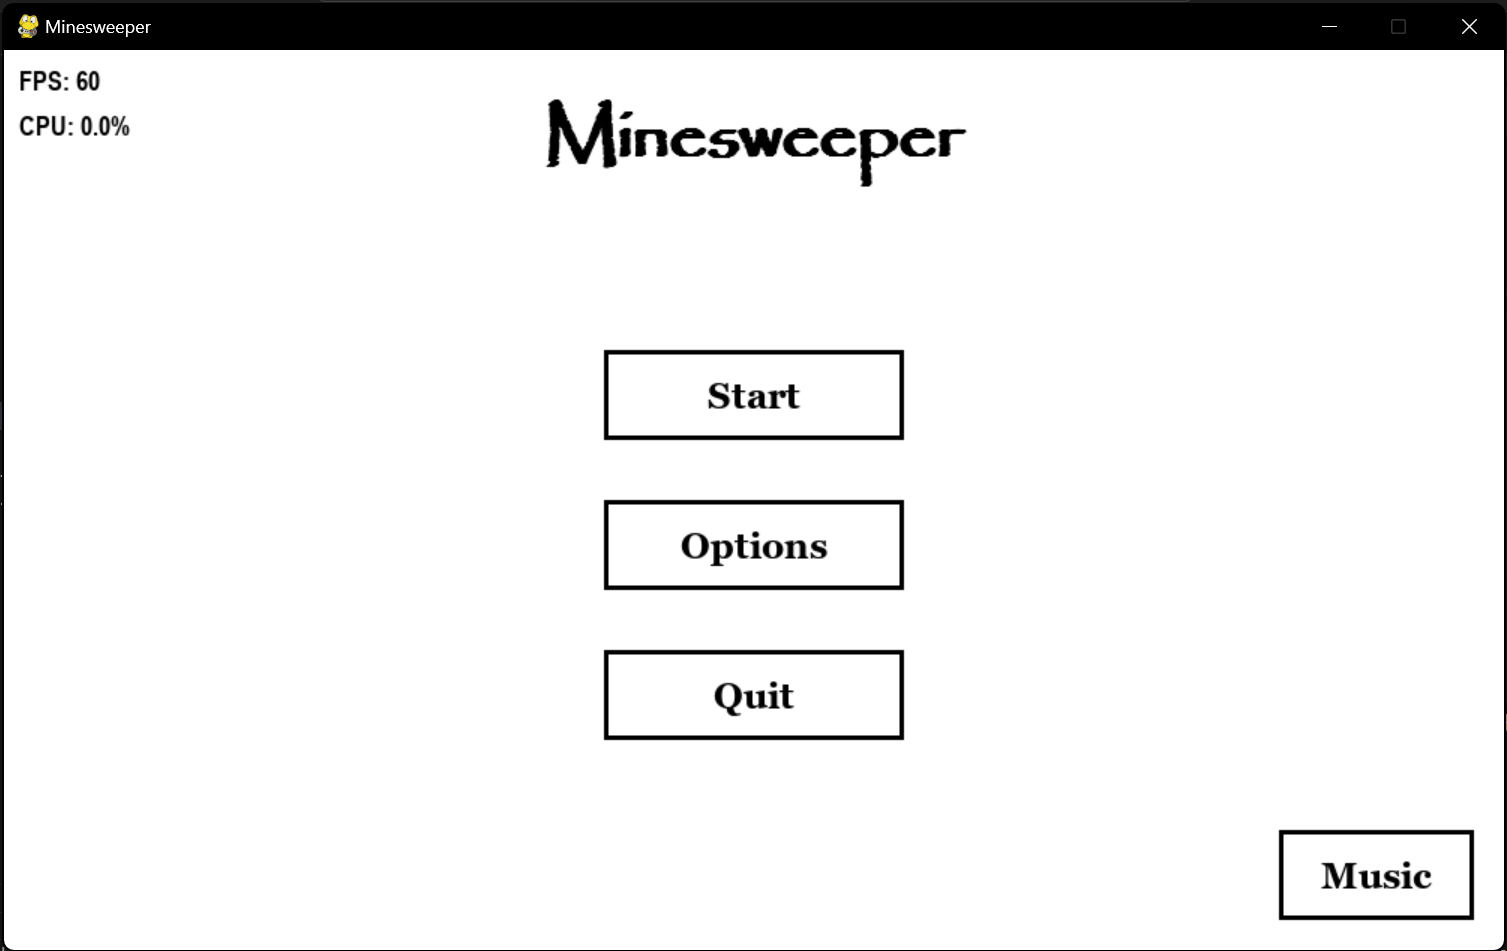

TEST SUCCESS


```
# Music Initialization
pygame.mixer.init()
pygame.mixer.music.load("FirelinkShrine.mp3")
pygame.mixer.music.play(-1)  # Loop indefinitely
music_on = True
```



```
global music_on
```



The sound works fine and the button does as intended.

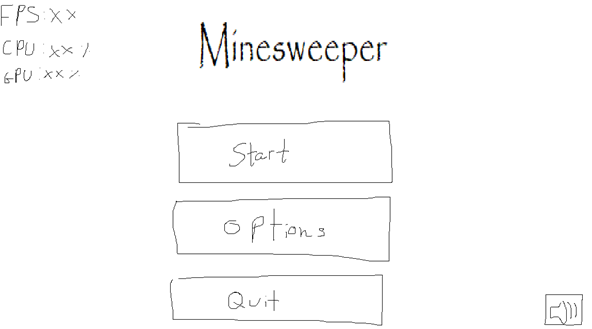

And with that, the start screen is finished for now.